Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)

Nome: Vinícius André Tochetto

Matrícula: 00312166

# TRABALHO 1: 


### Resposta de um sistema de vibração com 1 grau de liberdade a uma excitação na base: espectro de pseudo aceleração.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


## 1. Introdução 

Trabalho realizado para a disciplina de Introdução à vibrações, com o objetivo de medir por meio de um aplicativo de celular um sistema de vibração e realizar um espectro de pseudo-aceleração, com a linguagem de programação em Python. 


## 2. Metodologia

Com a utilização de um aplicativo de celular, o iNVH da Bosch, realizou-se uma medição da vibração de uma máquina de lavar no momento da centrifugação, colocando-se o celular sobre o tampo de vidro da mesma. Após realizada a medição em um intervalo de tempo, foi possível construir espectros de pseudo-aceleração. A máquina utilizada na medição é da marca Consul, como mostra a Figura 1:

<img src="images/maquina.png" alt="Heaviside" width="200px"/>

As propriedades mecânicas fictícias utilizadas foram: 

In [5]:
m  = 5.0       # system mass in kg
Tn = np.linspace(0.2,10,1000)
fn = 1.0/Tn    # natural frequency in Hz
zt = 0.01      # damping as ratio of critical
u0 = 0.        # initial displacement
v0 = 0.        # initial velocity


## 3. Utilizando o iNVH e a técnica de integração de Duhamel 

Os gráficos a seguir mostram como a vibração comportou-se durante o determinado período de tempo em que ocorreu a medição.

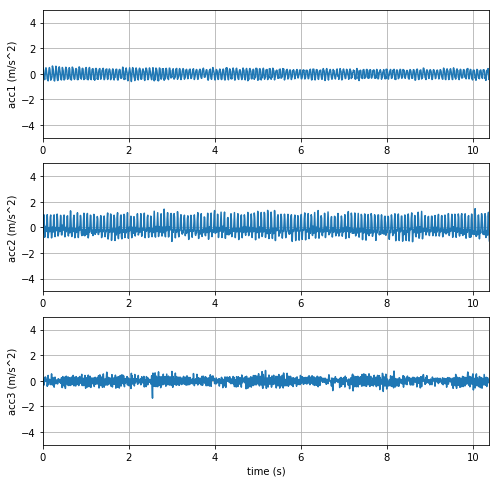

In [6]:
data = MRPy.from_file('data/iNVH001', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-5, 5);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');


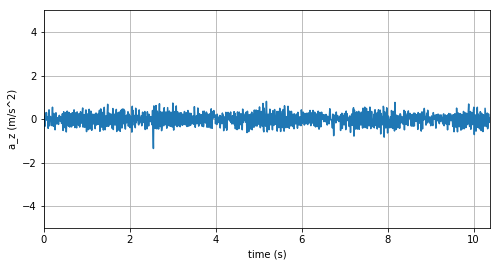

In [7]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-5, 5);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 


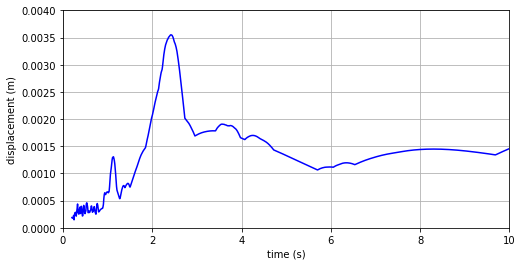

In [8]:
umax = np.zeros(fn.shape)

for k, f in enumerate(fn):
    u = az.sdof_Duhamel(f, zt, u0,v0)/m
    umax[k] = u.max()


plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(Tn, umax, 'b')

plt.xlim(0, Tn[-1]);        plt.xlabel('time (s)') 
plt.ylim(0.000, 0.004);   plt.ylabel('displacement (m)') 

plt.grid(True)


Com a posse do umáx foi possível contruir o gráfico de pseudo-aceleração: 

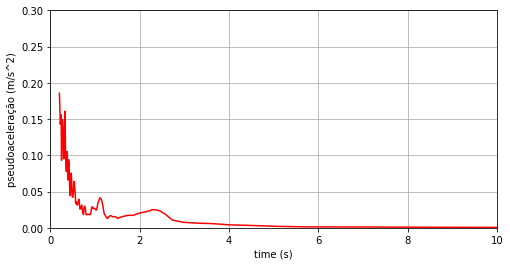

In [9]:
spa = umax*(2*np.pi*fn)**2

plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(Tn, spa, 'r')

plt.xlim(0, Tn[-1]);        plt.xlabel('time (s)') 
plt.ylim(0.000, 0.3);   plt.ylabel('pseudoaceleração (m/s^2)') 

plt.grid(True) 


## 4. Periodograma

O periodograma permite a observação da frequência em que o sistema possui mais energia. 

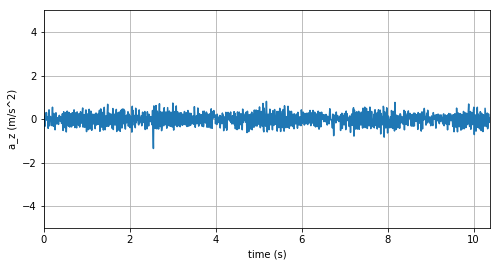

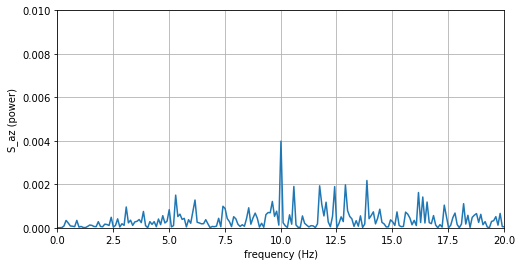

In [3]:
data = MRPy.from_file('data/iNVH001', form='invh').zero_mean()
az   = MRPy(data[2], data.fs)
t    = az.t_axis()

plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-5, 5);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 

Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 20);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  0.01);   plt.ylabel('S_az (power)') 

plt.grid(True)

# 5. Considerações finais 

Com os dados obtidos com o programa iNVH da Bosch, por meio de um aplicativo de celular, possibilitou a elaboração do gráfico de pseudo-aceleração de um sistema com um grau de liberdade, medido no momento da centrifugação de uma máquina de lavar, a qual teve sua aceleração máxima no início da medição, entre o tempo 0 e 1 segundo, pois com o passar do tempo não se registra mais picos de aceleração por conta do sistema se manter constante. O pico de energia obtido pela medição sucedeu-se na frequência de 10 Hz.    